### Part One : Exploratory Data Analysis


The file contains (simulated) timestamps of user logins in a particular geographic location. Aggregate these login counts based on 15­minute time intervals, and visualize and describe the resulting time series of login counts in ways that best characterize the underlying patterns of the demand. Please report/illustrate important features of the demand, such as daily cycles. If there are data quality issues, please report them.

In [1]:
#Loading the data file
import json
import pandas as pd
df=pd.read_json(r'logins.json')


In [2]:
df.head()


,login_time
0,1970-01-01 20:13:18
1,1970-01-01 20:16:10
2,1970-01-01 20:16:37
3,1970-01-01 20:16:36
4,1970-01-01 20:26:21


In [3]:
#Setting index for dataframe
df.set_index('login_time', inplace=True)

The login counts for every 15 minutes was aggregated and plotted.

In [4]:
df['login_count']=1
df=df.resample('15T').sum()
df.head()


,login_count
login_time,
1970-01-01 20:00:00,2
1970-01-01 20:15:00,6
1970-01-01 20:30:00,9
1970-01-01 20:45:00,7
1970-01-01 21:00:00,1


In [5]:
df=df.sort_index()

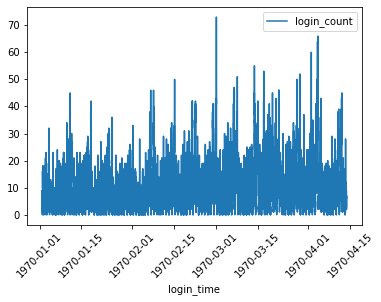

In [6]:
import seaborn as sns
import matplotlib.pyplot as plt
g=sns.lineplot(data=df)
plt.xticks(rotation=45);


In [7]:
df_new=df.reset_index()
df_new['hour'] = df_new.login_time.dt.hour

In [8]:
df_new.head()

,login_time,login_count,hour
0,1970-01-01 20:00:00,2,20
1,1970-01-01 20:15:00,6,20
2,1970-01-01 20:30:00,9,20
3,1970-01-01 20:45:00,7,20
4,1970-01-01 21:00:00,1,21


Let's explore the login counts in each hour!

In [9]:
df_hourly=df_new.groupby(['hour'])['login_count'].sum().sort_values(ascending=False)

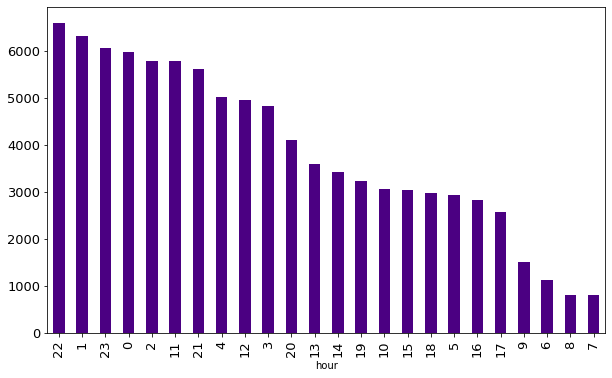

In [10]:
ax = df_hourly.plot(kind='bar', figsize=(10,6), color="indigo", fontsize=13);


Interestingly, most logins happened in late night and lower logins observed early mornings.Now we see the login counts in each day and plot it.

In [11]:
df_daily=df.resample('D').sum()
df_daily.head()

,login_count
login_time,
1970-01-01,112
1970-01-02,681
1970-01-03,793
1970-01-04,788
1970-01-05,459


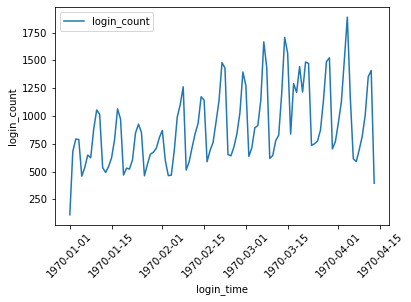

In [12]:
g=sns.lineplot(data=df_daily)
plt.xticks(rotation=45);
plt.ylabel('login_count');

We can see the login counts in each month.

In [13]:
df_monthly=df.resample('M').sum()
df_monthly.head()

,login_count
login_time,
1970-01-31,21239
1970-02-28,24673
1970-03-31,33723
1970-04-30,13507


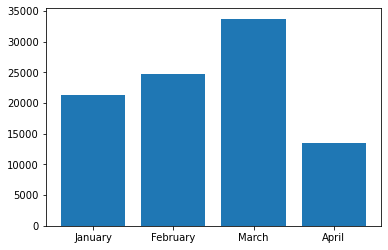

In [14]:
plt.bar(height=df_monthly['login_count'],x = ['January','February','March','April']);


The monthly trend showed the highest login rates in March. Also, the login rates decreased in April but it is acceptable, since we just have data until april 15th.The last step is login counts in each days of the week.

In [15]:
df_new['week_day'] = df_new.login_time.dt.day_name()


In [16]:
df_new.head()


,login_time,login_count,hour,week_day
0,1970-01-01 20:00:00,2,20,Thursday
1,1970-01-01 20:15:00,6,20,Thursday
2,1970-01-01 20:30:00,9,20,Thursday
3,1970-01-01 20:45:00,7,20,Thursday
4,1970-01-01 21:00:00,1,21,Thursday


In [17]:
df_weekday=df_new.groupby(['week_day'])['login_count'].sum().sort_values(ascending=False)

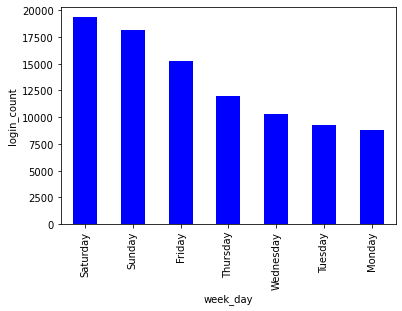

In [18]:
ax = df_weekday.plot(kind='bar', color="blue");
plt.ylabel('login_count');

Interestingly, most logins happened during weekends. Friday had next rank after the weekends.

### Part Two: Experiment & Metric Design

In [19]:
df=pd.read_json(r'ultimate_data_challenge.json')

In [20]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


The neighboring cities of Gotham and Metropolis have complementary circadian rhythms: on weekdays, Ultimate Gotham is most active at night, and Ultimate Metropolis is most active during the day. On weekends, there is reasonable activity in both cities.
However, a toll bridge, with a two­way toll, between the two cities causes driver partners to tend to be exclusive to each city. The Ultimate managers of city operations for the two cities have proposed an experiment to encourage driver partners to be available in both cities, by reimbursing all toll costs.
1. What would you choose as the key measure of success of this experiment in encouraging driver partners to serve both cities, and why would you choose this metric?
2. Describe a practical experiment you would design to compare the effectiveness of the proposed change in relation to the key measure of success. Please provide details on:
a. how you will implement the experiment
b. what statistical test(s) you will conduct to verify the significance of the
observation
c. how you would interpret the results and provide recommendations to the city
operations team along with any caveats.

**Solution:**


The metrics for this experiment could be the percentage of average time each driver spend in each cities. Currently, the ditribution is like a driver spend 100% time in Gotham and 0% time in Metropolis or the driver spend 100% time in Metropolis and no time in Gotham. So, the success measurement for the experiment could be spending 75% of time in Gotham and 25% in Metropolis for Gotham driver. In best case senario, the Gotham driver spend 50% of time in Gotham and 50% of time in Metropolis.

Another success measure metrics could be revenue. But revenue maynot be the best indicator since the maximizing revenue may mean driving just in one city since the fares in one city is higher than the other city. 

The statistical test design is like that: Currently, the driver spend 100% of time in Gotham or 100% of time in Metropolis. The goal would be change it to 50% of time in Gotham and 50% of time in Metropolis. 
The test will be done twice in different times of year ( summer & winter). The toll fares will be waived for drivers during the test. 

The one tailed z-test will be appropriate as statistical test since the number of samples are higher than 30 and we have normal distribution. By investigating p-value and confidence interval, we can say if the results are statistically significant or not. The threshold would be 0.05. So, we can say if we are 95% confident that the driver spent time has changed.

The caveat to the study, could be if we have very significant shift like Gotham driver spend less than 50% of time in Gotham. In that way the statistical test result is not meaningful.Another caveat, could be decreasing profit during the test. Since, the toll fares will be waived for the drivers. But, the profit increment is out of scope for this study.

### Part 3: Predictive modeling¶
Ultimate is interested in predicting rider retention. To help explore this question, we have provided a sample dataset of a cohort of users who signed up for an Ultimate account in January 2014. The data was pulled several months later; we consider a user retained if they were “active” (i.e. took a trip) in the preceding 30 days.

We would like you to use this data set to help understand what factors are the best predictors for retention, and offer suggestions to operationalize those insights to help Ultimate.

Perform any cleaning, exploratory analysis, and/or visualizations to use the provided data for this analysis (a few sentences/plots describing your approach will suffice). What fraction of the observed users were retained?
Build a predictive model to help Ultimate determine whether or not a user will be active in their 6th month on the system. Discuss why you chose your approach, what alternatives you considered, and any concerns you have. How valid is your model? Include any key indicators of model performance.
Briefly discuss how Ultimate might leverage the insights gained from the model to improve its longterm rider retention (again, a few sentences will suffice).

In [21]:
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9


In [22]:
# Making sure the sign up dates started fro January 2014.
import numpy as np
np.min(df['signup_date'])

'2014-01-01'

In [23]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 50000 entries, 0 to 49999
Data columns (total 12 columns):
 #   Column                  Non-Null Count  Dtype  
---  ------                  --------------  -----  
 0   city                    50000 non-null  object 
 1   trips_in_first_30_days  50000 non-null  int64  
 2   signup_date             50000 non-null  object 
 3   avg_rating_of_driver    41878 non-null  float64
 4   avg_surge               50000 non-null  float64
 5   last_trip_date          50000 non-null  object 
 6   phone                   49604 non-null  object 
 7   surge_pct               50000 non-null  float64
 8   ultimate_black_user     50000 non-null  bool   
 9   weekday_pct             50000 non-null  float64
 10  avg_dist                50000 non-null  float64
 11  avg_rating_by_driver    49799 non-null  float64
dtypes: bool(1), float64(6), int64(1), object(4)
memory usage: 4.2+ MB


The dates are not in right types and should be converted to datetime

In [24]:
df['signup_date']=pd.to_datetime(df['signup_date'])
df['last_trip_date']=pd.to_datetime(df['last_trip_date'])

In [25]:
df.describe()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver
count,50000.000000,41878.000000,50000.000000,50000.000000,50000.000000,50000.000000,49799.000000
mean,2.278200,4.601559,1.074764,8.849536,60.926084,5.796827,4.778158
std,3.792684,0.617338,0.222336,19.958811,37.081503,5.707357,0.446652
min,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,1.000000
25%,0.000000,4.300000,1.000000,0.000000,33.300000,2.420000,4.700000
50%,1.000000,4.900000,1.000000,0.000000,66.700000,3.880000,5.000000
75%,3.000000,5.000000,1.050000,8.600000,100.000000,6.940000,5.000000
max,125.000000,5.000000,8.000000,100.000000,100.000000,160.960000,5.000000


Let's explore the missing values counts.

In [26]:
# Finding missing values:
missing=pd.concat([df.isnull().sum(),100*df.isnull().mean()],axis=1)
missing.columns=['count','%']
missing.sort_values(by='%')

,count,%
city,0,0.000
trips_in_first_30_days,0,0.000
signup_date,0,0.000
avg_surge,0,0.000
last_trip_date,0,0.000
surge_pct,0,0.000
ultimate_black_user,0,0.000
weekday_pct,0,0.000
avg_dist,0,0.000
avg_rating_by_driver,201,0.402


In [27]:
df.shape

(50000, 12)

Most of missing values are in average rating of driver and average rating by driver. Also, the phone types are missed too. Now, we make histograms from data.

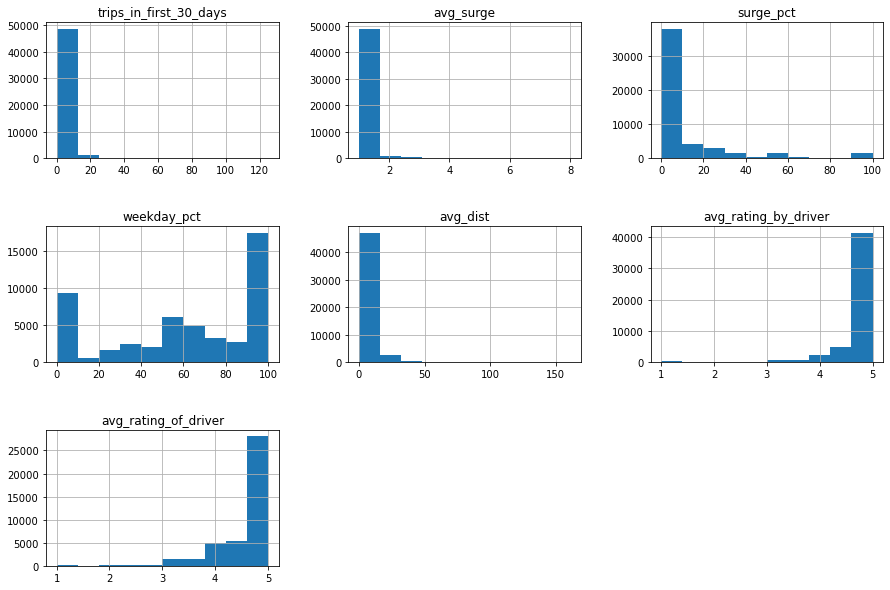

In [28]:
df[['trips_in_first_30_days','avg_surge','surge_pct','weekday_pct','avg_dist','avg_rating_by_driver','avg_rating_of_driver']].hist(figsize=(15,10))
plt.subplots_adjust(hspace=0.5);

Most of numerical variables are highly skewed. The ratings obviously are mostly high. Since the data seems very skewed for ratings, we can assume, the missing values are the median of whole distributions. Another approach could be using mode of the data. 

In [29]:
df['avg_rating_by_driver'].median()

5.0

In [30]:
df['avg_rating_of_driver'].median()

4.9

As you see, the median of data are very high ratings. We will use median imputer later in data pipeline.

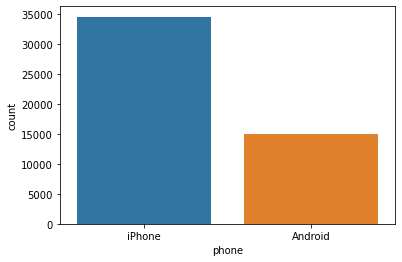

In [31]:
#Phone Type
sns.countplot(data=df, x='phone');

The phone type is also mostly iphone. So, we might able to impute the missing values with iphone. Although, I don't think the phone type is good variable to predict customer retains.

Let's explore outliers in the data.

In [32]:
df[df['trips_in_first_30_days']>60]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
99,Astapor,73,2014-01-27,4.9,1.00,2014-03-05,Android,0.0,True,89.7,2.86,4.9
3030,Winterfell,71,2014-01-06,4.9,1.06,2014-06-28,iPhone,2.9,True,85.9,2.32,4.8
18514,King's Landing,125,2014-01-02,5.0,1.12,2014-06-30,iPhone,14.4,True,72.0,2.02,4.8
29070,Astapor,63,2014-01-10,4.0,1.07,2014-06-29,iPhone,7.3,True,83.3,1.45,4.6


Another interesting point is that for some users, the number of trips were more than 60 in first 30 days which means more than twice a day. The average distances were pretty low in these cases.

In [33]:
df[df['avg_dist']>100]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
534,King's Landing,0,2014-01-04,NaN,1.0,2014-03-09,None,0.0,False,0.0,129.89,5.0
20701,Astapor,0,2014-01-25,NaN,1.0,2014-06-26,Android,0.0,False,100.0,160.96,NaN


In some cases, the average distances are more than 100 as an outlier.

In [34]:
df[df['avg_dist']==0.0]

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver
72,Astapor,1,2014-01-07,5.0,1.0,2014-01-08,iPhone,0.0,False,100.0,0.0,3.0
116,Winterfell,1,2014-01-10,5.0,1.0,2014-01-11,Android,0.0,False,100.0,0.0,5.0
188,Winterfell,1,2014-01-11,NaN,1.0,2014-01-14,Android,0.0,False,100.0,0.0,5.0
356,Winterfell,1,2014-01-15,4.0,1.0,2014-01-16,Android,0.0,False,100.0,0.0,5.0
479,Winterfell,1,2014-01-24,5.0,1.0,2014-01-25,iPhone,0.0,False,0.0,0.0,5.0
...,...,...,...,...,...,...,...,...,...,...,...,...
47929,Winterfell,0,2014-01-07,4.0,1.0,2014-03-14,iPhone,0.0,False,100.0,0.0,5.0
48283,Winterfell,0,2014-01-18,NaN,1.0,2014-03-08,Android,0.0,False,0.0,0.0,5.0
49464,Astapor,0,2014-01-03,5.0,1.0,2014-04-28,iPhone,0.0,False,100.0,0.0,5.0
49989,Winterfell,1,2014-01-24,NaN,1.0,2014-01-31,iPhone,0.0,False,100.0,0.0,5.0


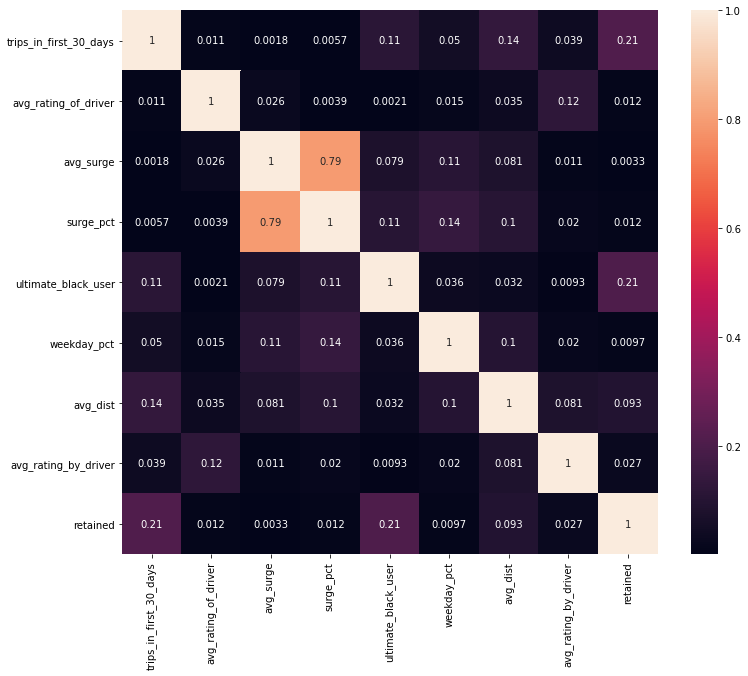

In [40]:
# Finding correlation between parameters in the heatmap
plt.subplots(figsize=(12,10))
sns.heatmap(abs(df.corr()), annot=True);

There are high correlation between surge_pct and avg_surge which makes sense. For other features, the correlation is below 0.1.

## How to find retained customers?

In [41]:
df['last_trip_date'].max()

Timestamp('2014-07-01 00:00:00')

The last trip date is first of July in January 2014. So, the users are active if they were active between June and July.

In [42]:
# Percentage of retained customers
df[df['last_trip_date']>='2014-06-01'].shape[0]/df.shape[0]*100

37.608000000000004

In [39]:
#Adding retained column
df['retained'] = np.where(df['last_trip_date']>='2014-06-01', 1, 0)
df.head()

,city,trips_in_first_30_days,signup_date,avg_rating_of_driver,avg_surge,last_trip_date,phone,surge_pct,ultimate_black_user,weekday_pct,avg_dist,avg_rating_by_driver,retained
0,King's Landing,4,2014-01-25,4.7,1.10,2014-06-17,iPhone,15.4,True,46.2,3.67,5.0,1
1,Astapor,0,2014-01-29,5.0,1.00,2014-05-05,Android,0.0,False,50.0,8.26,5.0,0
2,Astapor,3,2014-01-06,4.3,1.00,2014-01-07,iPhone,0.0,False,100.0,0.77,5.0,0
3,King's Landing,9,2014-01-10,4.6,1.14,2014-06-29,iPhone,20.0,True,80.0,2.36,4.9,1
4,Winterfell,14,2014-01-27,4.4,1.19,2014-03-15,Android,11.8,False,82.4,3.13,4.9,0


In [43]:
df.drop(['signup_date','last_trip_date'], axis=1, inplace=True)

In [44]:
X=df.drop(['retained'], axis=1)
y=df['retained']

In [48]:
X_encoded=pd.get_dummies(X,columns=['city','phone','ultimate_black_user'])

In [49]:
X_encoded.head()

,trips_in_first_30_days,avg_rating_of_driver,avg_surge,surge_pct,weekday_pct,avg_dist,avg_rating_by_driver,city_Astapor,city_King's Landing,city_Winterfell,phone_Android,phone_iPhone,ultimate_black_user_False,ultimate_black_user_True
0,4,4.7,1.10,15.4,46.2,3.67,5.0,0,1,0,0,1,0,1
1,0,5.0,1.00,0.0,50.0,8.26,5.0,1,0,0,1,0,1,0
2,3,4.3,1.00,0.0,100.0,0.77,5.0,1,0,0,0,1,1,0
3,9,4.6,1.14,20.0,80.0,2.36,4.9,0,1,0,0,1,0,1
4,14,4.4,1.19,11.8,82.4,3.13,4.9,0,0,1,1,0,1,0


The last step is predicting retained customers by decision tree model using pipeline and then using gridsearch cv to optimize the model parameters.

In [51]:
from sklearn.model_selection import train_test_split, cross_validate, GridSearchCV, learning_curve

X_train,X_test, y_train,y_test=train_test_split(X_encoded, y, test_size=0.2, random_state=42)

In [56]:
from sklearn.pipeline import make_pipeline
from sklearn.impute import SimpleImputer
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.tree import DecisionTreeClassifier


pipe= make_pipeline(
    SimpleImputer(strategy='median'), 
    StandardScaler(),
    DecisionTreeClassifier())

In [57]:
cv_results = cross_validate(pipe, X_train, y_train, cv=5)

In [58]:
cv_scores = cv_results['test_score']
cv_scores

array([0.71075 , 0.714375, 0.706875, 0.712875, 0.714125])

In [59]:
np.mean(cv_scores), np.std(cv_scores)

(0.7118, 0.0027766886753829547)

In [66]:
param_dict={"decisiontreeclassifier__max_depth":range(1,10), "decisiontreeclassifier__min_samples_split":range(2,10),"decisiontreeclassifier__min_samples_leaf":range(1,5)}

In [67]:
DT = GridSearchCV(pipe, param_grid=param_dict, cv=5)


In [68]:
DT.fit(X_train, y_train)


GridSearchCV(cv=5,
             estimator=Pipeline(steps=[('simpleimputer',
                                        SimpleImputer(strategy='median')),
                                       ('standardscaler', StandardScaler()),
                                       ('decisiontreeclassifier',
                                        DecisionTreeClassifier())]),
             param_grid={'decisiontreeclassifier__max_depth': range(1, 10),
                         'decisiontreeclassifier__min_samples_leaf': range(1, 5),
                         'decisiontreeclassifier__min_samples_split': range(2, 10)})

In [70]:
DT.best_params_

{'decisiontreeclassifier__max_depth': 9,
 'decisiontreeclassifier__min_samples_leaf': 1,
 'decisiontreeclassifier__min_samples_split': 2}

In [71]:
DT.best_estimator_

Pipeline(steps=[('simpleimputer', SimpleImputer(strategy='median')),
                ('standardscaler', StandardScaler()),
                ('decisiontreeclassifier',
                 DecisionTreeClassifier(max_depth=9))])

In [72]:
DT.best_score_

0.772375

In [73]:
y_tr_pred = DT.predict(X_train)
y_te_pred = DT.predict(X_test)

The last step is using confusion matrix and classification report to find precision, recall and f1 score.

In [74]:
from sklearn.metrics import classification_report, confusion_matrix


In [75]:
print(confusion_matrix(y_test, y_te_pred))
print(classification_report(y_test, y_te_pred))

[[5229  990]
 [1302 2479]]
              precision    recall  f1-score   support

           0       0.80      0.84      0.82      6219
           1       0.71      0.66      0.68      3781

    accuracy                           0.77     10000
   macro avg       0.76      0.75      0.75     10000
weighted avg       0.77      0.77      0.77     10000



Now, we see feature importance in the bar graph.

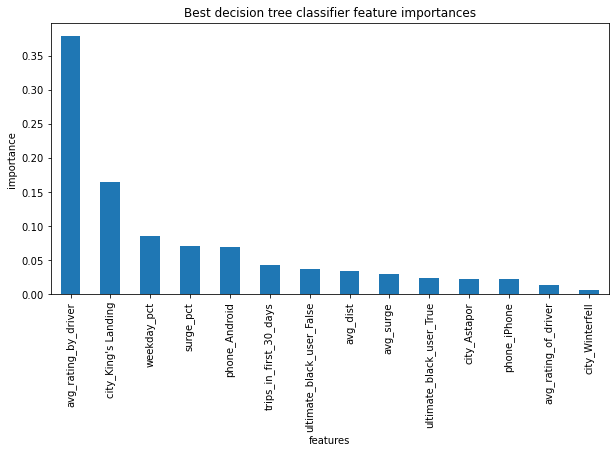

In [77]:

plt.subplots(figsize=(10, 5))
imps_DT = DT.best_estimator_._final_estimator.feature_importances_
DT_imps = pd.Series(imps_DT, index=X_train.columns).sort_values(ascending=False)
DT_imps.plot(kind='bar')
plt.xlabel('features')
plt.ylabel('importance')
plt.title('Best decision tree classifier feature importances');

As city of King's Landing is important in the prediction of retained customers, we can see cities values of counts in the retained and non-retained customers.

In [89]:
df_retained=df[df['retained']==1]

In [91]:
df_retained['city'].value_counts()/df_retained['city'].shape[0]

Winterfell        0.436769
King's Landing    0.338385
Astapor           0.224846
Name: city, dtype: float64

In [92]:
df_not_retained=df[df['retained']!=1]

In [93]:
df_not_retained['city'].value_counts()/df_not_retained['city'].shape[0]

Winterfell        0.484774
Astapor           0.394474
King's Landing    0.120753
Name: city, dtype: float64

Then, we explore avg rating by driver in the retained and non-retained customers.

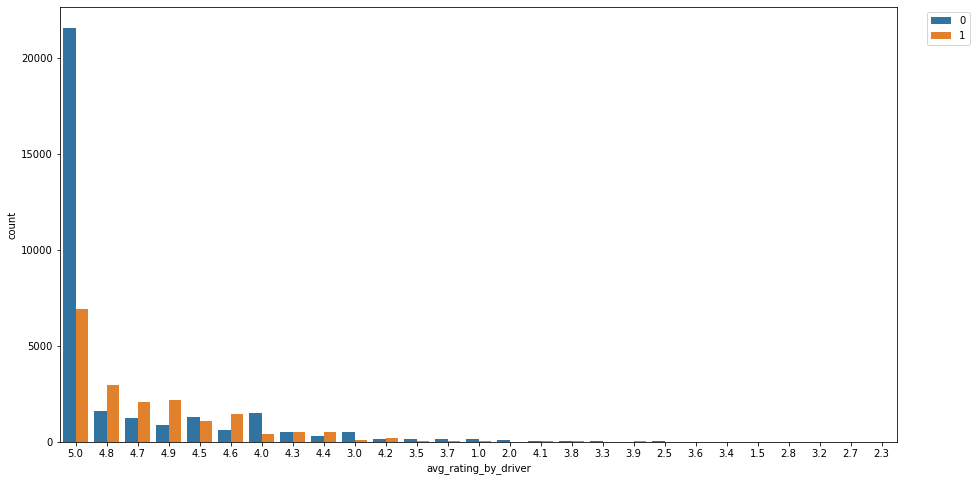

In [104]:
plt.figure(figsize=(15,8))

ax = sns.countplot(x="avg_rating_by_driver", hue="retained", data=df, order = df['avg_rating_by_driver'].value_counts().index)
ax.legend(bbox_to_anchor= (1.03, 1)) ;


Based on these results, here are the main conclusions are:
* In higher average rating by driver, more retained customers observed.
* More retained customers observed for city of King's Landing. So, it's better to operate in city of King's Landing to retain customers or understand what is unique about this city.
* People who use cabs on the weekdays are more likely to be retained.